First attempt at easy to code multidimensional Kalman filter in a straightforward way using the wikipedia page for Kalman filter

In [2]:
import numpy as np 

class kalmanfilter(object):
    def __init__(self, F = None, H = None, Q = None, R = None, B = None, x_estimate = None, P = None ):
        """Attributes aka vars will go here -- all values sre defaulted to None """
        self.state_transition_F = F 
        self.observation = H
        self.process_noise_cov_Q = Q
        self.obs_noise_cov_R = R
        self.control_input_B = B
        self.state_cov_P = P 
        self.x_state_estimate = x_estimate
        #TODO: add np.matrix so that you can do a multiple dimension KF 
    
    def predict(self, u_controlVec = 0):
        """Prediction equations will go here"""
        self.x_state_estimate = self.state_transition_F*self.x_state_estimate-1 + self.control_input_B*u_controlVec
        self.state_cov_P = self.state_transition_F*self.state_cov_P-1*np.transpose(self.state_transition_F) + self.process_noise_cov_Q
        
        return self.x_state_estimate
    
    def update(self):
        """Update equations will go here"""
        kalman_gain = None 
    
    

Start off with a simple 1D Kalman Filter -- A tracking Algorithm

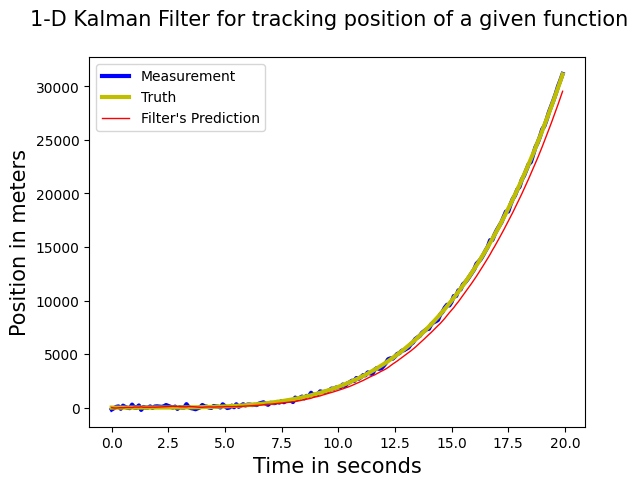

In [25]:
import numpy as np 
from numpy import transpose, shape 
from numpy.linalg import inv
import matplotlib.pyplot as plt

class Kalman1D(object):
    
    
    def __init__(self, dt, sigma_measurement, sigma_acc, u_control ): 
        # initialize attributes
        self.dt = dt # 
        self.A = np.matrix([[1, self.dt], # Transition Matrix 
                            [0, 1]])
        
        self.B = np.matrix([[0.5*(self.dt)**2], # control matrix  
                            [self.dt]]) 
        
        self.Q = np.matrix([[self.dt**2/4, self.dt**3/2], # process noise covariance
                            [self.dt**3/2, self.dt**2]])
        
        self.H = np.matrix([[1, 0]]) #transformation matrix 
        self.R = sigma_measurement**2
        self.u_control = u_control 
        self.x = np.matrix([[0],[0]]) # matrix that will be filled with data 
        self.P = np.eye(self.A.shape[1]) #matrix that will be filled with data 
        
        
    def predict(self):
        
        # priori esttimate eqn 
        self.x = np.dot(self.A, self.x) + np.dot(self.B,self.u_control)
        
        # priori coverriance eqn
        self.P = np.dot(np.dot(self.A, self.P), transpose(self.A)) + self.Q 
        
        return self.x
    
    def update(self, z_measurement):
        
        # Auxiliary S = (HPH + R)^-1 
        
        s_aux =  inv(np.dot(np.dot(self.H, self.P), transpose(self.H)) + self.R)
        k_top = np.dot(self.P, transpose(self.H))
        
        # Full Kalman equantion
        kalman_coeff = np.dot(k_top,s_aux)
        
        # updated/posteriori state stimate 
        self.x = self.x + np.dot(kalman_coeff, z_measurement - np.dot(self.H, self.x))
        
        # updated/posteriori covarience matrix 
        eye_matrix = np.eye(self.H.shape[1])
        self.P = (eye_matrix - kalman_coeff*self.H)*self.P
        

    
def main():
    
    ## intialize 
    
    dt = 0.1 # time step 
    t = np.arange(0,20, dt) # interval and partition 
    sigma_measurement = 2  # random start off point for standard deviation of measurement noise
    sigma_acc = 0.9        # random reference point for standard devation of acceleration (error cov)
    u_control = 1.5        # random reference point for control attribute since we have no data
    
    # model function we are tracking
    true_track = 0.2*(t**4 - 3*t**2)
    
    # creating instance
    kalman1 = Kalman1D(dt, sigma_measurement, sigma_acc, u_control)
    
    measurement = []
    prediction =  []
    
    for x_est in true_track:
        measurement_residual = np.random.normal(0,100)
        z_measurement_model = kalman1.H * x_est + measurement_residual
        
        measurement.append(z_measurement_model.item(0))
        prediction.append(kalman1.predict()[0])
        
        kalman1.update(z_measurement_model.item(0))


    graph = plt.figure()
    
    graph.suptitle('1-D Kalman Filter for tracking position of a given function', fontsize = 15)
    
    plt.plot(t, measurement, label= "Measurement", color = 'b', linewidth = 3)
    plt.plot(t, np.array(true_track), label= "Truth", color = 'y', linewidth = 3)
    plt.plot(t, np.squeeze(prediction), label= "Filter's Prediction", color = 'r', linewidth = 1) # method squeeze is helpful here 
    
    plt.xlabel('Time in seconds', fontsize = 15)
    plt.ylabel("Position in meters", fontsize = 15)
    plt.legend()
    plt.show()
    
    
if __name__ == '__main__':
        
    main()

Some lessons learned and future tips to think about: 

1) build helper function to check for appropriate matrix dimensions -- makes it easier to debug
2) learned more about numpy and also squeeze method to deal with arrays in 1 dimension. (and also (2,) array output dim format)